# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Pedro Marcelino](http://pmarcelino.com) - February 2017

Other Kernels: [Data analysis and feature extraction with Python
](https://www.kaggle.com/pmarcelino/data-analysis-and-feature-extraction-with-python)

----------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df = pd.read_csv('WTR_RL_FS_Airline_1568377938244')
df.head(5)

,File Type,Airline,Reason For Loss,Fault Station,Files,Bags,Date
0,AHL,0B,0,XXX,1,1,2019-09-01
1,AHL,0B,11,DUB,1,1,2019-09-01
2,AHL,0B,11,FCO,1,2,2019-09-01
3,AHL,0B,11,LTN,1,1,2019-09-01
4,AHL,0B,11,NAP,1,1,2019-09-01


In [3]:
#check the decoration
# print(df.shape)
# print (df.columns)
df.columns

Index(['File Type', 'Airline', ' Reason For Loss', ' Fault Station', 'Files',
       'Bags', 'Date'],
      dtype='object')

In [4]:
#descriptive statistics summary
df.describe(include="all")


,File Type,Airline,Reason For Loss,Fault Station,Files,Bags,Date
count,82754,82754,82754.000000,82754,82754.000000,82754.000000,82754
unique,2,424,NaN,2015,NaN,NaN,1
top,AHL,AA,NaN,CDG,NaN,NaN,2019-09-01
freq,61276,2586,NaN,1439,NaN,NaN,82754
mean,NaN,NaN,57.660826,NaN,13.277388,17.797122,NaN
std,NaN,NaN,24.834428,NaN,278.929698,381.360420,NaN
min,NaN,NaN,0.000000,NaN,1.000000,0.000000,NaN
25%,NaN,NaN,35.000000,NaN,1.000000,1.000000,NaN
50%,NaN,NaN,64.000000,NaN,2.000000,2.000000,NaN
75%,NaN,NaN,80.000000,NaN,4.000000,5.000000,NaN


In [5]:
df.info()
df.astype('object').describe().transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82754 entries, 0 to 82753
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   File Type         82754 non-null  object
 1   Airline           82754 non-null  object
 2    Reason For Loss  82754 non-null  int64 
 3    Fault Station    82754 non-null  object
 4   Files             82754 non-null  int64 
 5   Bags              82754 non-null  int64 
 6   Date              82754 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.4+ MB


,count,unique,top,freq
File Type,82754,2,AHL,61276
Airline,82754,424,AA,2586
Reason For Loss,82754,91,21,5956
Fault Station,82754,2015,CDG,1439
Files,82754,644,1,38808
Bags,82754,755,1,33619
Date,82754,1,2019-09-01,82754


In [6]:
df[' Reason For Loss'].unique()
df['Airline'].unique()
df['Date'].unique()
df['File Type'].unique()

array(['AHL', 'DPR'], dtype=object)

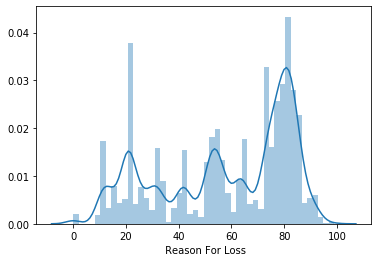

In [8]:

#histogram
sns.distplot(df[' Reason For Loss']);
# sns.distplot(df['File Type']);



*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


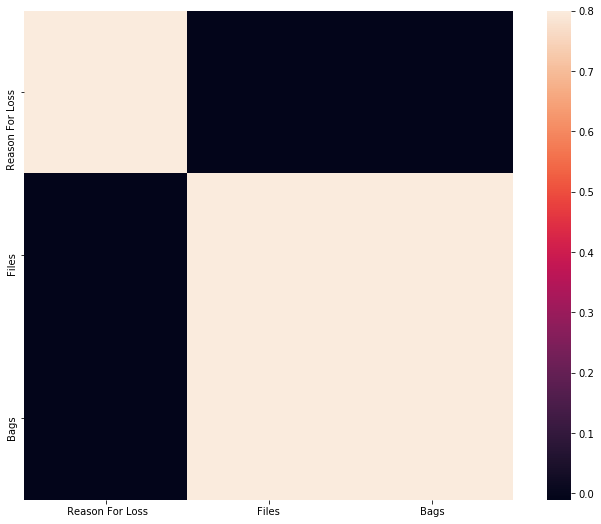

In [30]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);